In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from PIL import Image
import os
from sklearn import datasets
import glob
import numpy as np

kshot = 5

def browse_images(predsdir, predsfiles, ttipredsdir, ttipredsfiles, sprtsdir, 
                  sprtsfiles, qriesdir, qriesfiles, specific_seq=''):
    n = len(predsfiles)
    def view_image(i):
        plt.figure(figsize=(30, 10), dpi=80)
        if specific_seq == '':
            fname = convert_back(predsfiles[i])
        else:
            fname = predsfiles[i]
        predimg = Image.open(os.path.join(predsdir, fname))
        plt.subplot(4, 5, 1)
        plt.axis('off')
        plt.imshow(predimg)
        plt.title('File: %s' % predsfiles[i], loc='center')
        
        
        if specific_seq == '':
            fname = convert_back(ttipredsfiles[i])
        else:
            fname = ttipredsfiles[i]
        ttipredimg = Image.open(os.path.join(ttipredsdir, fname))
        plt.subplot(4, 5, 5+1)
        plt.axis('off')
        plt.imshow(ttipredimg)
        
        for j in range(kshot):
            if specific_seq == '':
                fname = convert_back(sprtsfiles[i*kshot+j])
            else:
                fname = sprtsfiles[i*kshot+j]
            sprtimg = Image.open(os.path.join(sprtsdir, fname))
            plt.subplot(4, 5, j+5*2+1)
            plt.axis('off')
            plt.imshow(sprtimg)
        
        if specific_seq == '':
            fname = convert_back(qriesfiles[i])
        else:
            fname = qriesfiles[i]
        qryimg = Image.open(os.path.join(qriesdir, fname))
        plt.subplot(4, 5, 5*3 + 1)
        plt.axis('off')
        plt.imshow(qryimg)
        
        
        plt.show()
        
    interact(view_image, i=(0,n-1))

def convert(array):
    for i in range(len(array)):
        tokens = array[i].split('_')
        indexed_tokens = [1, 3]
        for j in indexed_tokens:
            tokens[j] = '%05d'%int(tokens[j])
        
        new = ''
        for t in tokens:
            new += t + '_'
        array[i] = new[:-1]
    return array

def convert_back(fname):
    tokens = fname.split('_')
    indexed_tokens = [1, 3]
    for j in indexed_tokens:
        tokens[j] = '%d'%int(tokens[j])

    new = ''
    for t in tokens:
        new += t + '_'
    return new[:-1]

#main_dir = '/home/msiam/Visualizations/ytvis_split0_failedseqs/'
#main_dir = '/local/data0/ytvis_plots_repaired_global_only/episodes'
main_dir = '/local/data0/ytvis_plots_repaired/episodes'
split = '3'

failed_seqs = np.load('/home/msiam/Code/temp/temporal_fss/analysis_npys/sp%s/failed_seqs_betterrepri.npy'%split)
good_seqs = np.load('/home/msiam/Code/temp/temporal_fss/analysis_npys/sp%s/good_seqs_bettertti.npy'%split)

print('Failed ', len(failed_seqs), 'Good ', len(good_seqs))
#idx = -2500
idx = -10
#specific_seq = 'run_0_iter_14579_'
#specific_seq = failed_seqs[idx]#convert_back(sorted(convert(list(failed_seqs)))[idx]) + '_'
specific_seq = good_seqs[idx]
print(specific_seq)
predsdir = os.path.join(main_dir, 'repri', 'split_%s'%split, 'preds')
if specific_seq != '':
    seqs = glob.glob(os.path.join(predsdir, '%s*'%specific_seq))
else:
    seqs = convert(os.listdir(predsdir))
predsfiles = sorted(seqs)

ttipredsdir = os.path.join(main_dir, 'tti', 'split_%s'%split, 'preds')
if specific_seq != '':
    seqs = glob.glob(os.path.join(ttipredsdir, '%s*'%specific_seq))
else:
    seqs = convert(os.listdir(predsdir))
ttipredsfiles = sorted(seqs)

qriesdir = os.path.join(main_dir, 'repri', 'split_%s'%split, 'queries')
if specific_seq != '':
    seqs = glob.glob(os.path.join(qriesdir, '%s*'%specific_seq))
else:
    seqs = convert(os.listdir(qriesdir))
qriesfiles = sorted(seqs)

sprtsdir = os.path.join(main_dir, 'repri', 'split_%s'%split, 'supports')
if specific_seq != '':
    seqs = glob.glob(os.path.join(sprtsdir, '%s*'%specific_seq))
else:
    seqs = convert(os.listdir(sprtsdir))
sprtsfiles = sorted(seqs)

print('Before Calling Browse Images')
browse_images(predsdir, predsfiles, ttipredsdir, ttipredsfiles, sprtsdir, 
              sprtsfiles, qriesdir, qriesfiles, specific_seq)

Failed  1062 Good  1442
run_1_iter_1095
Before Calling Browse Images


interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

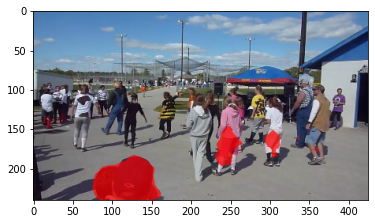

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

fname = '/home/msiam/Visualizations/ytvis_split0_failedseqs/repri/split_0/preds/run_0_iter_9136_00003.png'
img = Image.open(fname)

plt.imshow(img)